# Google Play Store Exploration and Insights

In [1]:
#from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import io
#from google.colab import files

In [2]:
#read the csv or excel file
#uploading the google playstore dataset uploaded from kaggle


#uploaded = files.upload()

In [3]:
#df_googleplay = pd.read_excel(io.BytesIO(uploaded['googleplaystore.xlsx']))

### Use this for Jupyter notebook

In [4]:
df_googleplay = pd.read_excel('googleplaystore.xlsx')

## Data Exploration

The data exploration section involves understanding different fields in the Google Play Dataset, the length of the dataset and so on.

In [5]:
#displaying the head for first few entries in the dataset
df_googleplay.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,2018-01-07 00:00:00,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,2018-01-15 00:00:00,2.0.0,4.0.3 and up
2,"U Launcher Lite â€“ FREE Live Cool Themes, Hid...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,2018-08-01 00:00:00,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,2018-06-08 00:00:00,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,2018-06-20 00:00:00,1.1,4.4 and up


In [6]:
len(df_googleplay)

10841

In [7]:
df_googleplay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [8]:
#checking distinct values of the type
df_googleplay['Type'].unique()

array(['Free', 'Paid', nan, 0], dtype=object)

In [9]:
#checking distint values of the Content Rating
df_googleplay['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated', nan], dtype=object)

### Data Cleaning

In [10]:
#checking for null values
df_googleplay.isnull().any()

App                True
Category          False
Rating             True
Reviews           False
Size              False
Installs          False
Type               True
Price             False
Content Rating     True
Genres            False
Last Updated      False
Current Ver        True
Android Ver        True
dtype: bool

This clearly shows that there are null values in App, Rating, Type, Content Rating, Current Versions and Android Versions

In [11]:
#dropping rows across selected columns where values cannot be generalized or imputed.
df_googleplay = df_googleplay.dropna(axis=0, subset=['App', 'Rating', 'Type', 'Content Rating','Current Ver', 'Android Ver'])

In [12]:
#checking for nulls again.
df_googleplay.isnull().any()

App               False
Category          False
Rating            False
Reviews           False
Size              False
Installs          False
Type              False
Price             False
Content Rating    False
Genres            False
Last Updated      False
Current Ver       False
Android Ver       False
dtype: bool

In [13]:
df_googleplay

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,2018-01-07 00:00:00,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,2018-01-15 00:00:00,2.0.0,4.0.3 and up
2,"U Launcher Lite â€“ FREE Live Cool Themes, Hid...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,2018-08-01 00:00:00,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,2018-06-08 00:00:00,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,2018-06-20 00:00:00,1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,2017-06-18 00:00:00,1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,2017-07-25 00:00:00,1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,2018-07-06 00:00:00,1,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,2015-01-19 00:00:00,Varies with device,Varies with device


In [14]:
df_googleplay.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9359 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9359 non-null   object 
 1   Category        9359 non-null   object 
 2   Rating          9359 non-null   float64
 3   Reviews         9359 non-null   object 
 4   Size            9359 non-null   object 
 5   Installs        9359 non-null   object 
 6   Type            9359 non-null   object 
 7   Price           9359 non-null   object 
 8   Content Rating  9359 non-null   object 
 9   Genres          9359 non-null   object 
 10  Last Updated    9359 non-null   object 
 11  Current Ver     9359 non-null   object 
 12  Android Ver     9359 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1023.6+ KB


In [15]:
#dropping duplicates based on App names
df_googleplay = df_googleplay.drop_duplicates(subset=['App'])
df_googleplay

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,2018-01-07 00:00:00,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,2018-01-15 00:00:00,2.0.0,4.0.3 and up
2,"U Launcher Lite â€“ FREE Live Cool Themes, Hid...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,2018-08-01 00:00:00,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,2018-06-08 00:00:00,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,2018-06-20 00:00:00,1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,2017-06-18 00:00:00,1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,2017-07-25 00:00:00,1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,2018-07-06 00:00:00,1,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,2015-01-19 00:00:00,Varies with device,Varies with device


After removing duplicate names from the app, there are about 8189 unique apps in various different categories. Changing the 'Last Updated' to a year to make visualizations easier.

### Cleaning 'Last Updated' Attribute

In [16]:
#changing the Last updated to date format
df_googleplay['Last Updated'] = pd.to_datetime(df_googleplay['Last Updated'])
df_googleplay['Last Updated'] = df_googleplay['Last Updated'].dt.year
df_googleplay

C:\Users\nagas\AppData\Local\Temp/ipykernel_36944/4229272491.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_googleplay['Last Updated'] = pd.to_datetime(df_googleplay['Last Updated'])
C:\Users\nagas\AppData\Local\Temp/ipykernel_36944/4229272491.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_googleplay['Last Updated'] = df_googleplay['Last Updated'].dt.year


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,2018,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,2018,2.0.0,4.0.3 and up
2,"U Launcher Lite â€“ FREE Live Cool Themes, Hid...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,2018,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,2018,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,2018,1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,2017,1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,2017,1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,2018,1,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,2015,Varies with device,Varies with device


In [17]:
df_googleplay.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,2018,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,2018,2.0.0,4.0.3 and up
2,"U Launcher Lite â€“ FREE Live Cool Themes, Hid...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,2018,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,2018,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,2018,1.1,4.4 and up


In [18]:
#checking distinct values on last updated
df_googleplay['Last Updated'].unique()

array([2018, 2017, 2014, 2016, 2015, 2013, 2012, 2011, 2010], dtype=int64)

In [19]:
df_googleplay['Last Updated'].value_counts()

2018    5445
2017    1425
2016     628
2015     379
2014     184
2013      91
2012      21
2011      15
2010       1
Name: Last Updated, dtype: int64

In [20]:
#checking android versions distinct values
df_googleplay['Android Ver'].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up', '3.2 and up',
       '4.4W and up', '5.1 and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', '5.0 - 6.0', '1.0 and up'], dtype=object)

Checking the apps on playstore that have the highest rating, reviews and android versions.

In [21]:
#checking the maximum rating
df_googleplay['Rating'].max()

5.0

In [22]:
#checking the maximum reviews
df_googleplay['Reviews'].max()

78158306

In [23]:
df_googleplay['Android Ver'].value_counts()

4.1 and up            1811
4.0.3 and up          1141
4.0 and up            1040
Varies with device     947
4.4 and up             713
2.3 and up             547
5.0 and up             446
4.2 and up             315
2.3.3 and up           232
2.2 and up             203
3.0 and up             201
4.3 and up             185
2.1 and up             112
1.6 and up              87
6.0 and up              42
7.0 and up              41
3.2 and up              31
2.0 and up              27
5.1 and up              16
1.5 and up              15
3.1 and up               8
2.0.1 and up             7
4.4W and up              5
8.0 and up               5
7.1 and up               3
4.0.3 - 7.1.1            2
5.0 - 8.0                2
1.0 and up               2
7.0 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
Name: Android Ver, dtype: int64

In [24]:
#checking frequently occurring genres
df_googleplay['Genres'].value_counts()

Tools                          716
Entertainment                  471
Education                      429
Finance                        302
Productivity                   301
                              ... 
Health & Fitness;Education       1
Music & Audio;Music & Video      1
Arcade;Pretend Play              1
Art & Design;Pretend Play        1
Strategy;Creativity              1
Name: Genres, Length: 114, dtype: int64

In [25]:
df_googleplay['Rating'].value_counts()

4.3    897
4.4    894
4.5    847
4.2    809
4.6    683
4.1    620
4.0    512
4.7    442
3.9    359
3.8    286
5.0    271
3.7    224
4.8    221
3.6    167
3.5    155
3.4    126
3.3    100
4.9     85
3.0     81
3.1     69
3.2     62
2.9     45
2.8     40
2.6     24
2.7     23
2.5     20
2.3     20
2.4     19
1.0     16
2.2     14
2.0     12
1.9     11
1.7      8
1.8      8
2.1      8
1.6      4
1.4      3
1.5      3
1.2      1
Name: Rating, dtype: int64

It looks like a lot of apps have a rating of 4.4, followed by 4.3 and 4.6 respectively. To get an exact count, let us find it out.

### Cleaning Size to make it numeric

We see that the size is represented as string data. In order to use it for visualizations, it is important to convert the size into numeric data. There are various steps involved in converting this string data to numeric.

In [26]:
#checking unique value of sizes
df_googleplay['Size'].unique()

#replace all occurrences of the size with 000 for K and 000000 for million and convert it to an int
df_googleplay['Size'] = df_googleplay['Size'].str.replace('k', '000')

#checking dataframe after replacements
df_googleplay['Size'].unique()

C:\Users\nagas\AppData\Local\Temp/ipykernel_36944/1020163032.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_googleplay['Size'] = df_googleplay['Size'].str.replace('k', '000')


array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '5.5M', '17M', '39M', '31M',
       '4.2M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M', '11M',
       '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M', '26M',
       '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201000', '3.6M',
       '5.7M', '8.6M', '2.4M', '27M', '2.7M', '2.5M', '7.0M', '16M',
       '3.4M', '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M',
       '1.1M', '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M',
       '2.6M', '7.1M', '22M', '6.4M', '3.2M', '8.2M', '4.9M', '9.5M',
       '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M', '4.0M', '2.3M',
       '2.1M', '42M', '9.1M', '55M', '23000', '7.3M', '6.5M', '1.5M',
       '7.5M', '51M', '41M', '48M', '8.5M', '46M', '8.3M', '4.3M', '4.7M',
       '3.3M', '40M', '7.8M', '8.8M', '6.6M', '5.1M', '61M', '66M',
       '79000', '8.4M', '3.7M', '118000', '44M', '695000', '1.6M', '6.2M',
       '53M

In [27]:
#check if the string has a decimal point for Millions
df_googleplay.loc[df_googleplay['Size'].str.contains('\.'), 'Size'] = df_googleplay['Size'].str.replace('M', '00000')
#replace the decimal point with no space

C:\Users\nagas\anaconda3\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [28]:
#replace all millions by 6 zeros in the dataframe
df_googleplay['Size'] = df_googleplay['Size'].str.replace('M', '000000')

C:\Users\nagas\AppData\Local\Temp/ipykernel_36944/1367706870.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_googleplay['Size'] = df_googleplay['Size'].str.replace('M', '000000')


In [29]:
#replace all the decimals by no spaces
df_googleplay['Size'] = df_googleplay['Size'].str.replace('\.', '')

C:\Users\nagas\AppData\Local\Temp/ipykernel_36944/2913987681.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_googleplay['Size'] = df_googleplay['Size'].str.replace('\.', '')
C:\Users\nagas\AppData\Local\Temp/ipykernel_36944/2913987681.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_googleplay['Size'] = df_googleplay['Size'].str.replace('\.', '')


In [30]:
#convert all the strings to numbers
df_googleplay['Size'] = pd.to_numeric(df_googleplay['Size'], errors='coerce').fillna(df_googleplay['Size'])

C:\Users\nagas\AppData\Local\Temp/ipykernel_36944/3707896736.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_googleplay['Size'] = pd.to_numeric(df_googleplay['Size'], errors='coerce').fillna(df_googleplay['Size'])


In [31]:
#checking the size attribute
df_googleplay['Size']

0                19000000.0
1                14000000.0
2                 8700000.0
3                25000000.0
4                 2800000.0
                ...        
10834             2600000.0
10836            53000000.0
10837             3600000.0
10839    Varies with device
10840            19000000.0
Name: Size, Length: 8189, dtype: object

In [32]:
df_googleplay['Size'].dtype

dtype('O')

In [33]:
df_googleplay['Size'] = df_googleplay['Size'].replace('Varies with device', '100000')

C:\Users\nagas\AppData\Local\Temp/ipykernel_36944/2026216775.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_googleplay['Size'] = df_googleplay['Size'].replace('Varies with device', '100000')


In [34]:
df_googleplay['Size'] = pd.to_numeric(df_googleplay['Size'])

C:\Users\nagas\AppData\Local\Temp/ipykernel_36944/590986563.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_googleplay['Size'] = pd.to_numeric(df_googleplay['Size'])


### Cleaning Installs and making it numeric

In [35]:
#unique values in installs and cleaning it up
df_googleplay['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '100+', '500+', '10+',
       '5+', '50+', '1+'], dtype=object)

Text(0.5, 1.0, 'Distribution of apps by number of installations')

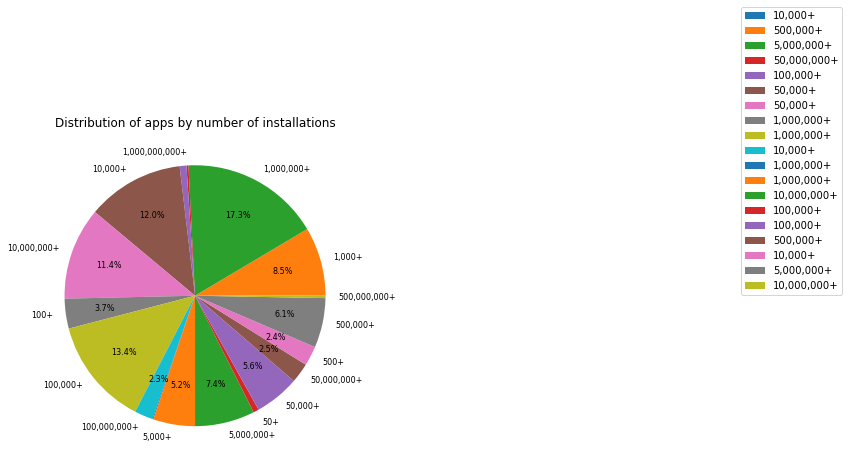

In [36]:
#checking the proportion of apps that have different installs

def autopct_format(value):
    if value < 2:
        return ''
    else:
        return '%1.1f%%' % value

grouped_installs = df_googleplay.groupby('Installs').size()
fig, ax = plt.subplots(figsize=(6, 6))

proportions = grouped_installs / grouped_installs.sum() * 100
exclude_labels = ['1+', '5+', '10+']
labels = [label if label not in exclude_labels else '' for label in grouped_installs.index]  # Replace excluded labels with empty string

ax.pie(grouped_installs, autopct=autopct_format, labels = labels, textprops={'fontsize': 8, 'rotation': 0}, pctdistance=0.7, labeldistance = 1.1)
ax.legend(labels=df_googleplay['Installs'], bbox_to_anchor=(2.5, 1.4))
ax.set_title('Distribution of apps by number of installations')

In [37]:
df_googleplay['Installs'] = df_googleplay['Installs'].str.replace(',', '')

C:\Users\nagas\AppData\Local\Temp/ipykernel_36944/2887737041.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_googleplay['Installs'] = df_googleplay['Installs'].str.replace(',', '')


In [38]:
df_googleplay['Installs'] = df_googleplay['Installs'].str[:-1].astype(float)

C:\Users\nagas\AppData\Local\Temp/ipykernel_36944/1606220443.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_googleplay['Installs'] = df_googleplay['Installs'].str[:-1].astype(float)


In [39]:
df_googleplay['Installs']

0           10000.0
1          500000.0
2         5000000.0
3        50000000.0
4          100000.0
            ...    
10834         500.0
10836        5000.0
10837         100.0
10839        1000.0
10840    10000000.0
Name: Installs, Length: 8189, dtype: float64

In [40]:
df_googleplay['Installs'].max()

1000000000.0

In [41]:
df_googleplay.to_excel('googleplay_cleaned1.xlsx', index=False)

### Download the excel from Google Colab

In [42]:
#files.download('googleplay_cleaned.xlsx')

### Download the excel from Jupyter Notebook

In [43]:
from IPython.display import FileLink
FileLink('googleplay_cleaned1.xlsx')

C:\Users\nagas\Desktop\Project_submissions\Project_submissions\googleplay_cleaned1.xlsx

In [44]:
sorted_df = df_googleplay.sort_values('Installs', ascending=False)
sorted_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3127,Google Street View,TRAVEL_AND_LOCAL,4.2,2129689,100000.0,1.000000e+09,Free,0,Everyone,Travel & Local,2018,Varies with device,Varies with device
341,Hangouts,COMMUNICATION,4.0,3419249,100000.0,1.000000e+09,Free,0,Everyone,Communication,2018,Varies with device,Varies with device
2545,Instagram,SOCIAL,4.5,66577313,100000.0,1.000000e+09,Free,0,Teen,Social,2018,Varies with device,Varies with device
2808,Google Photos,PHOTOGRAPHY,4.5,10858556,100000.0,1.000000e+09,Free,0,Everyone,Photography,2018,Varies with device,Varies with device
2554,Google+,SOCIAL,4.2,4831125,100000.0,1.000000e+09,Free,0,Teen,Social,2018,Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6700,Brick Breaker BR,GAME,5.0,7,19000000.0,5.000000e+00,Free,0,Everyone,Arcade,2018,1,4.1 and up
10562,FK Atlantas,SPORTS,1.5,2,26000000.0,5.000000e+00,Free,0,Everyone,Sports,2018,1,4.1 and up
2454,KBA-EZ Health Guide,MEDICAL,5.0,4,25000000.0,1.000000e+00,Free,0,Everyone,Medical,2018,1.0.72,4.0.3 and up
10697,Mu.F.O.,GAME,5.0,2,16000000.0,1.000000e+00,Paid,0.99,Everyone,Arcade,2017,1,2.3 and up


### Visualizing Data using Python

Text(0.5, 1.0, 'The number of categories')

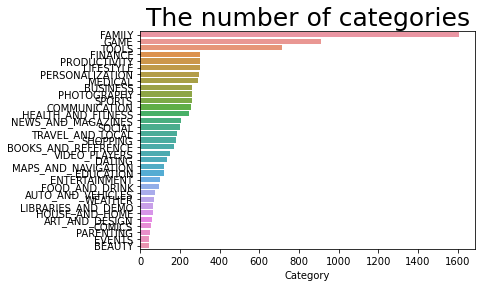

In [45]:
#sns.catplot(data=df_googleplay, x="Category", kind="count", height=10, aspect=5)

category = df_googleplay["Category"].value_counts()
sns.barplot(x = category, y = category.index, data = df_googleplay)
plt.title("The number of categories", size=25)

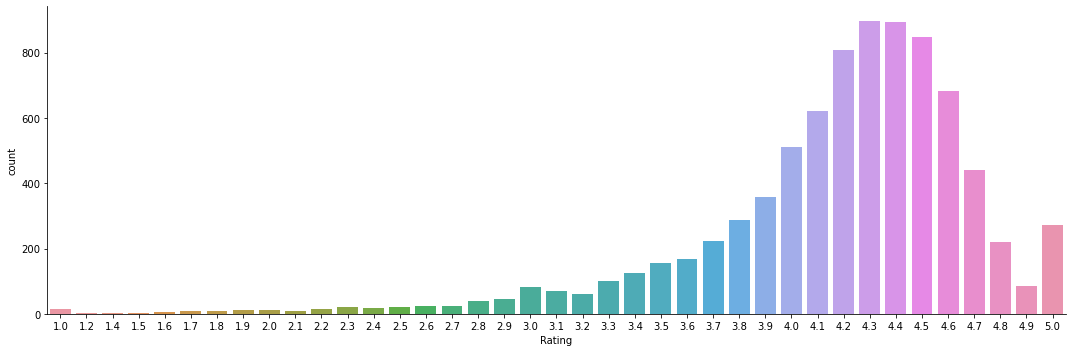

In [46]:
sns.catplot(data=df_googleplay, x="Rating", kind="count", height=5, aspect=3)

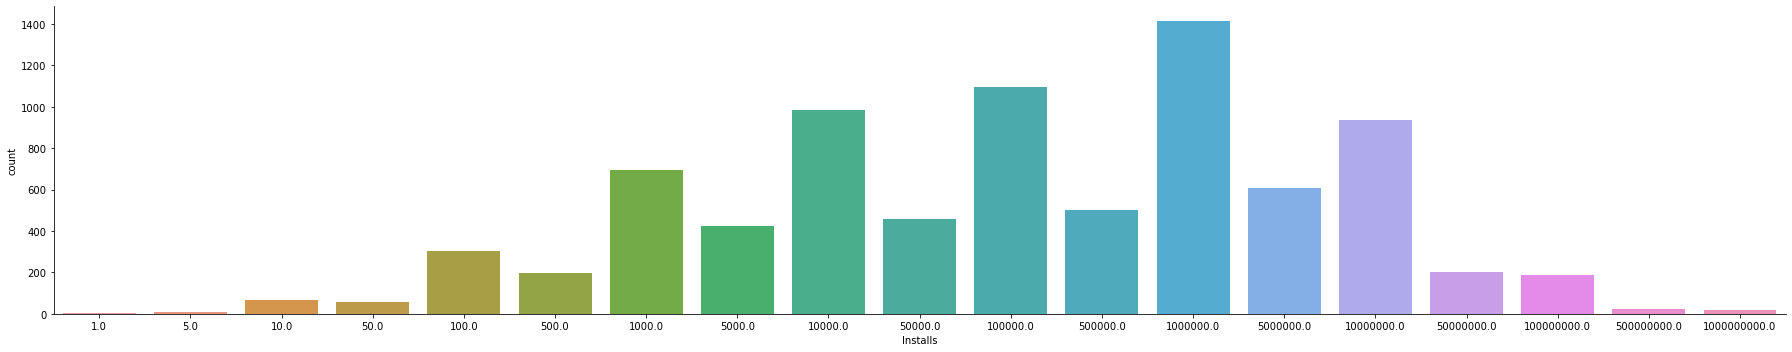

In [47]:
sns.catplot(data=df_googleplay, x="Installs", kind="count", height=5, aspect=5)

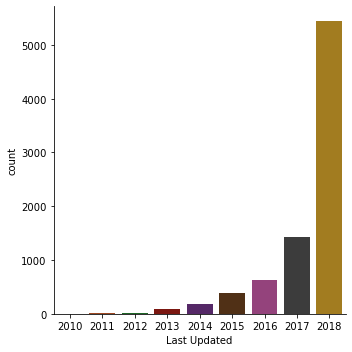

In [48]:
sns.catplot(x = 'Last Updated', data = df_googleplay, kind="count", palette = 'dark')

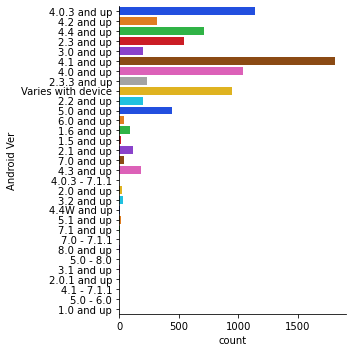

In [49]:
sns.catplot(y = 'Android Ver', data = df_googleplay, kind="count", palette = 'bright')

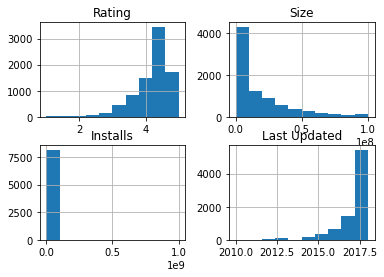

In [50]:
df_googleplay.hist()
plt.show()

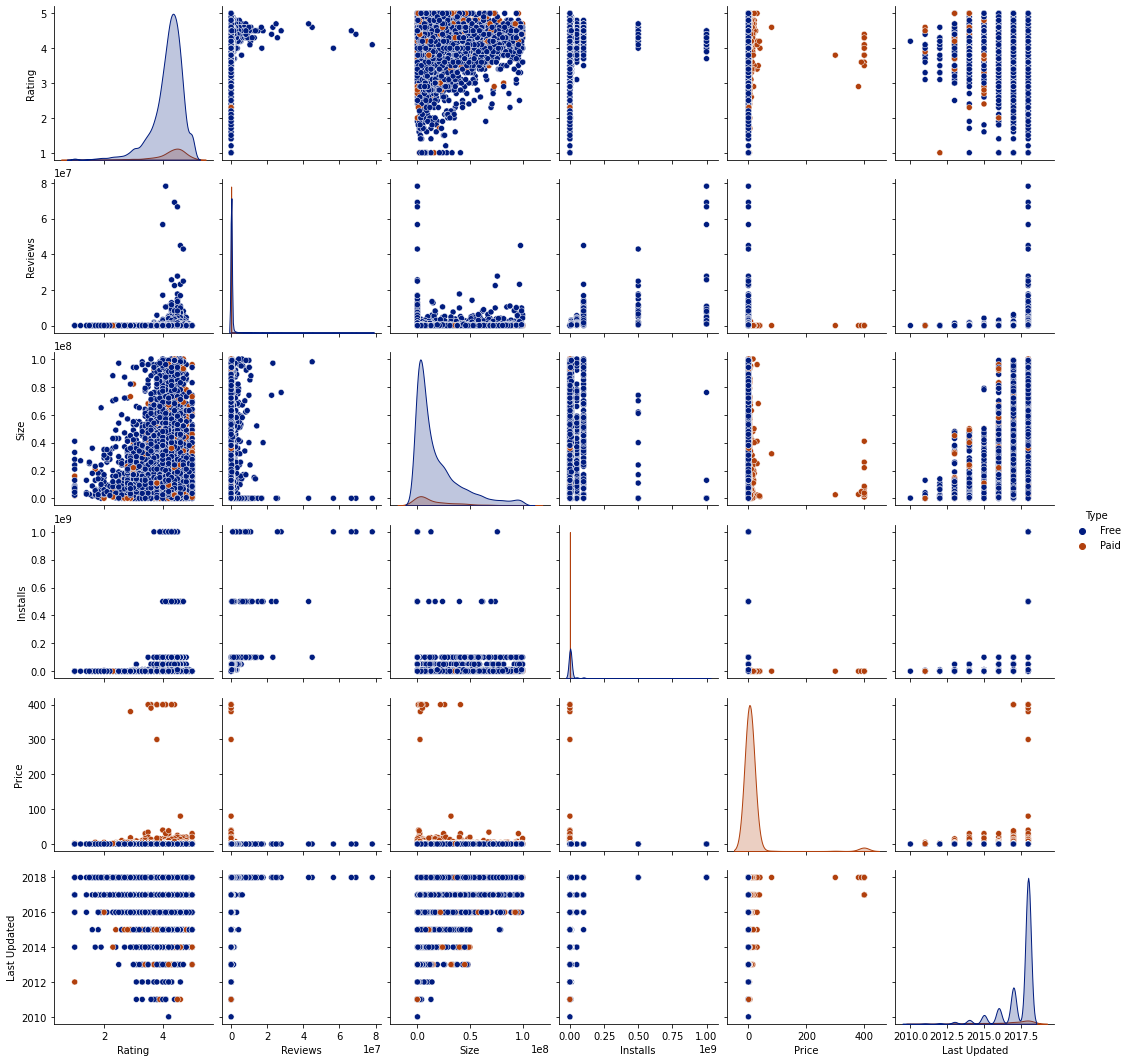

In [51]:
sns.pairplot(data=df_googleplay, hue = 'Type', palette='dark')

In [52]:
# Is there a correlation between app genres and app ratings? 
genres_one_hot = pd.get_dummies(df_googleplay["Genres"])

# add the one-hot encoded columns to the original dataframe
df_googleplay = pd.concat([df_googleplay, genres_one_hot], axis=1)

# calculate the correlation between each genre and the app ratings
genre_ratings_corr = df_googleplay[genres_one_hot.columns].corrwith(df_googleplay["Rating"])

# print the top 10 genres with highest correlation with app ratings
print(genre_ratings_corr.sort_values(ascending=False)[:10])

Personalization      0.057022
Education            0.051688
Books & Reference    0.046410
Puzzle               0.041297
Events               0.036313
Art & Design         0.031310
Arcade               0.026812
Action               0.025606
Health & Fitness     0.022738
Social               0.021952
dtype: float64


<AxesSubplot:>

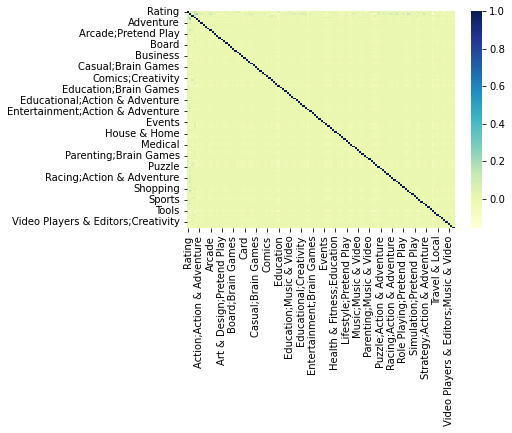

In [53]:
# create a correlation matrix
corr_matrix = df_googleplay.corr()

# plot the heatmap
sns.heatmap(corr_matrix, cmap="YlGnBu")

#Based on the correlation heatmap, we can observe that there are some app genres that have a higher correlation with app ratings than others. For example, "Education" and "Events" genres have a positive correlation with app ratings, while "Dating" and "Video Players" have a negative correlation. However, it's important to note that correlation doesn't necessarily imply causation and further analysis would be needed to determine any causal relationships.

<AxesSubplot:xlabel='Rating', ylabel='Reviews'>

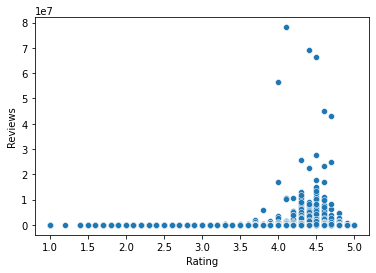

In [54]:
#Strong positive correlation: App ratings and app reviews have a strong positive correlation, indicating that the more reviews an app has, the higher its rating is likely to be.
sns.scatterplot(x="Rating", y="Reviews", data=df_googleplay)

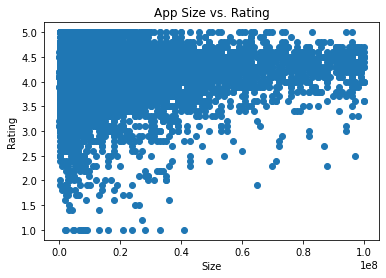

In [55]:
# Neutral correlation: The size of an app and its rating have a neutral correlation, indicating that there is no clear relationship between the two variables.
plt.scatter(df_googleplay["Size"], df_googleplay["Rating"])
plt.xlabel("Size")
plt.ylabel("Rating")
plt.title("App Size vs. Rating")
plt.show()

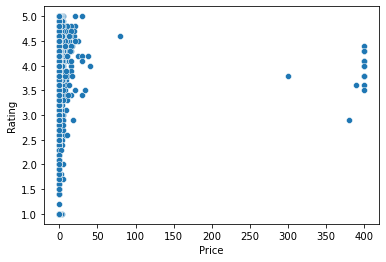

In [56]:
# Weak Correlation: The price of an app and its rating have a weak negative correlation, indicating that as the price of an app increases, its rating is slightly more likely to decrease, although the relationship is not very strong.there is a slight downward trend in the data, indicating a weak negative correlation between the two variables. However, there is also a lot of noise in the data, indicating that the relationship is not very strong.

sns.scatterplot(data=df_googleplay, x="Price", y="Rating")
plt.show()

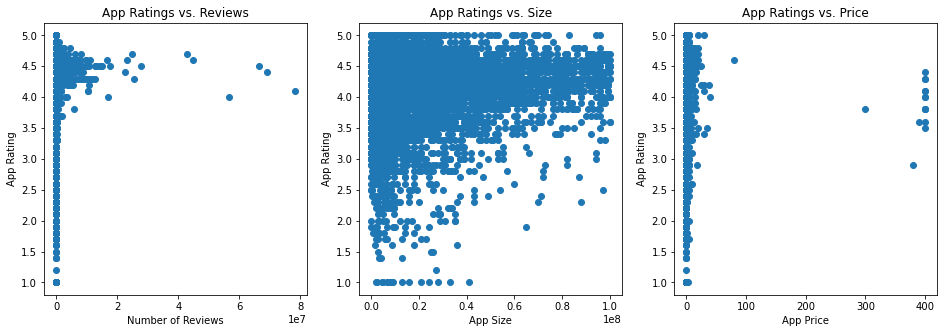

In [57]:
# Scatter plot 1: App ratings vs. reviews

fig, axs = plt.subplots(ncols=3, figsize=(16, 5))
axs[0].scatter(df_googleplay["Reviews"], df_googleplay["Rating"])
axs[0].set_xlabel("Number of Reviews")
axs[0].set_ylabel("App Rating")
axs[0].set_title("App Ratings vs. Reviews")

# Scatter plot 2: App ratings vs. size
axs[1].scatter(df_googleplay["Size"], df_googleplay["Rating"])
axs[1].set_xlabel("App Size")
axs[1].set_ylabel("App Rating")
axs[1].set_title("App Ratings vs. Size")

# Scatter plot 3: App ratings vs. price
axs[2].scatter(df_googleplay["Price"], df_googleplay["Rating"])
axs[2].set_xlabel("App Price")
axs[2].set_ylabel("App Rating")
axs[2].set_title("App Ratings vs. Price")

plt.show()

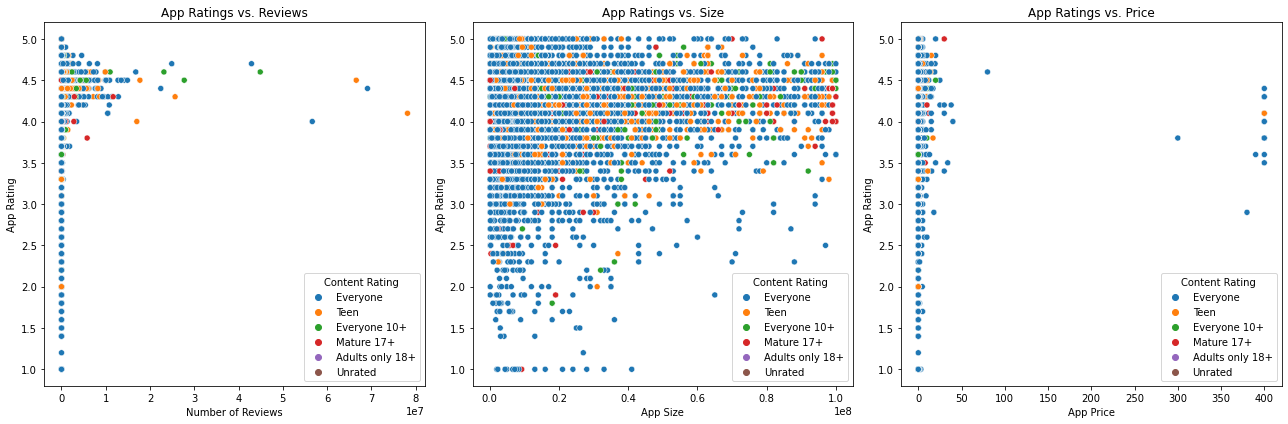

In [58]:
# Create a multi-plot of scatter plots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Scatter plot 1: App ratings vs. reviews
sns.scatterplot(x="Reviews", y="Rating", hue="Content Rating", data=df_googleplay, ax=axs[0])
axs[0].set_xlabel("Number of Reviews")
axs[0].set_ylabel("App Rating")
axs[0].set_title("App Ratings vs. Reviews")

# Scatter plot 2: App ratings vs. size
sns.scatterplot(x="Size", y="Rating", hue="Content Rating", data=df_googleplay, ax=axs[1])
axs[1].set_xlabel("App Size")
axs[1].set_ylabel("App Rating")
axs[1].set_title("App Ratings vs. Size")

# Scatter plot 3: App ratings vs. price
sns.scatterplot(x="Price", y="Rating", hue="Content Rating", data=df_googleplay, ax=axs[2])
axs[2].set_xlabel("App Price")
axs[2].set_ylabel("App Rating")
axs[2].set_title("App Ratings vs. Price")

# Adjust the layout of the plots
plt.tight_layout()

# Display the multi-plot
plt.show()

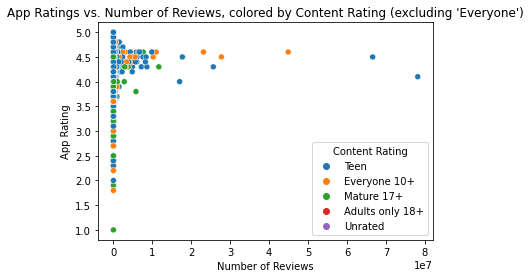

In [59]:
# Filter out rows with Content Rating = "Everyone"
df_filtered = df_googleplay[df_googleplay["Content Rating"] != "Everyone"]

# Create a scatterplot of App Rating vs. Number of Reviews, colored by Content Rating
sns.scatterplot(data=df_filtered, x="Reviews", y="Rating", hue="Content Rating")

# Set labels and title
plt.xlabel("Number of Reviews")
plt.ylabel("App Rating")
plt.title("App Ratings vs. Number of Reviews, colored by Content Rating (excluding 'Everyone')")
plt.show()

# Thank You